In [26]:
from functions import *
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import shap
from sklearn.model_selection import train_test_split
from collections import Counter

## Data Preprocessing

In [27]:
path_1 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/BHT1_merged.csv"
path_2 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/BHT2_merged.csv"
path_3 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/BHT3_merged.csv"

BHT_1 = pd.read_csv(path_1, sep=',')
BHT_2 = pd.read_csv(path_2, sep=',')
BHT_3 = pd.read_csv(path_3, sep=',')


In [28]:
## set modules
module1 = ['M01_1_N', 'M02_1_N', 'M03_1_N', 'M04_1_N', 'M05_1_N', 'M06_1_N']

module2 = [
            'M01_2_N', 'M02_2_N', 'M03_2_N', 'M04_2_N', 'M05_2_N', 'M06_2_N',
            'M07_2_N', 'M08_2_N', 'M09_2_N', 'M10_2_N', 'M11_2_N', 'M12_2_N',]

module3 = ['M01_3_N', 'M02_3_N', 'M03_3_N', 'M04_3_N', 'M05_3_N', 'M06_3_N',
            'M07_3_N', 'M08_3_N', 'M09_3_N', 'M10_3_N', 'M11_3_N', 'M12_3_N',
            'M13_3_N', 'M14_3_N', 'M15_3_N', 'M16_3_N', 'M17_3_N']

### Search Space / Param Grid 

In [29]:
from hyperopt import *
search_space = {
    'n_estimators': hp.choice('n_estimators', np.arange(5, 50, 5)),  # Smaller number of trees for small datasets
    'max_depth': hp.choice('max_depth', np.arange(4, 10)),  # Limit depth to prevent overfitting
    'max_features': hp.choice('max_features', [None]),  # Control the number of features considered
    'bootstrap': hp.choice('bootstrap', [True]),  # Set bootstrap to True to avoid overfitting
    'criterion': hp.choice('criterion', ['entropy']),  # Criterion for splitting node    
    'min_impurity_decrease': hp.uniform('min_impurity_decrease', 0.001, 0.03),
    'ccp_alpha': hp.uniform('ccp_alpha', 0.007, 0.3),
    'oob_score': hp.choice('oob_score', [True]),  # Out-of-bag samples estimation for validation
    'class_weight': 'balanced',
}


## BHT semester 1

In [30]:
# Count occurrences of each unique value in the 'status' column
counter_1 = Counter(BHT_1['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_1[1]} | 0: {counter_1[0]}')
hpo = ModelTrainer(random_state=42)
x, y = hpo.split_data(BHT_1, module1)

Quantity of Drop Out and Degree in THL-1: 
 1: 280 | 0: 59


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:01<00:00,  6.33trial/s, best loss: -0.7072222222222222]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            09               03
	 actual 1            12               44

Model parameters:
{'bootstrap': True, 'ccp_alpha': 0.07077876183822902, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.029681215313309264, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 45, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Balanced acc.: 76.78571%
Validation accuracy.: 77.94118%
Sensitivity score (for 1): 78.57143%
Specificity score (for 0): 75.00000%
F1 score.: 85.43689%
False prediction: 22.05882%

-----------------------

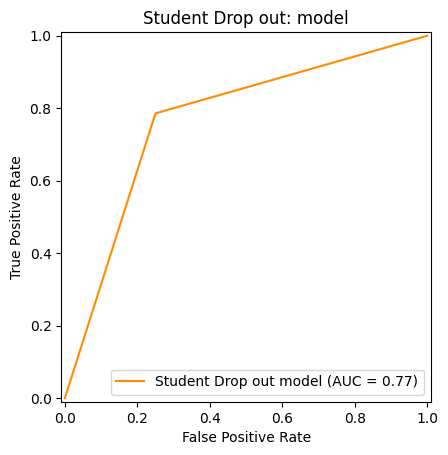

In [31]:
model_1, feature_importance_1 = hpo.cross_validation_hpo(
    x=x, y=y,
    search_space=search_space, 
    folds=5,
    algo='rf'
    )

In [32]:
feature_importance_1

,Feature,Importance
4,M05_1_N,0.761905
3,M04_1_N,0.177590
5,M06_1_N,0.047619
0,M01_1_N,0.012886
1,M02_1_N,0.000000
2,M03_1_N,0.000000


#### Shap analysis

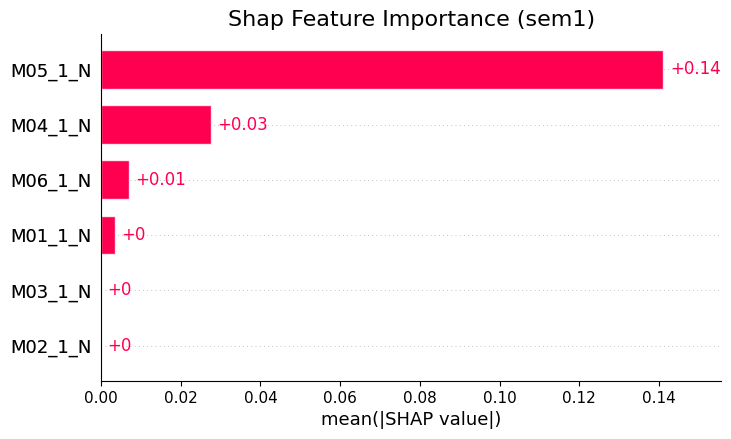

In [33]:
## Shap Global explainations
import shap
explainer = shap.TreeExplainer(model_1['model'], model_1['x_train'])
shap_values = explainer(model_1['x_test'])

plt.title('Shap Feature Importance (sem1)', fontsize=16)
shap.plots.bar(shap_values[...,1])

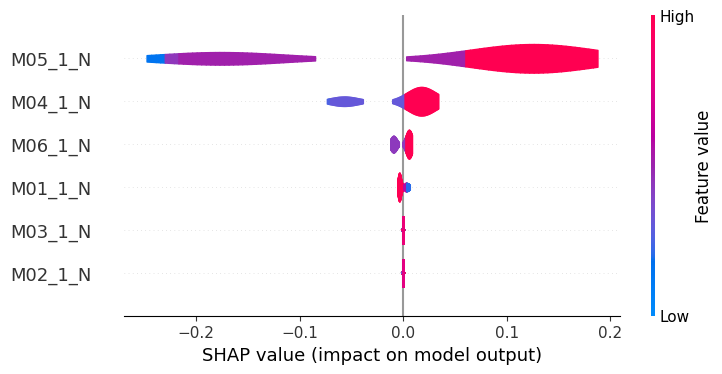

In [34]:
shap.plots.violin(shap_values[...,1], show=True)

In [35]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values[...,1], link='logit')

In [36]:
hpo.plot_shap_force(model=model_1, shap_values=shap_values, student_index=12, link='logit', model_name='rf') 

Student index 12 grades:
         grades
M01_1_N     1.0
M02_1_N     2.0
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.306, Probability [1]: 0.694


In [37]:
hpo.plot_shap_force(model=model_1, shap_values=shap_values, student_index=14, link='logit', model_name='rf') 

Student index 14 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.316, Probability [1]: 0.684


In [38]:
hpo.plot_shap_force(model=model_1, shap_values=shap_values, student_index=4, link='logit', model_name='rf') 

Student index 4 grades:
         grades
M01_1_N     1.0
M02_1_N     1.7
M03_1_N     1.3
M04_1_N     1.0
M05_1_N     1.0
M06_1_N     1.0
Status: 0, Prediction: [0], Probability [0]: 0.711, Probability [1]: 0.289


## BHT semester 2 

In [51]:
# Count occurrences of each unique value in the 'status' column
counter_2 = Counter(BHT_2['status'])
print(f'Quantity of Drop Out and Degree in THL-2: \n 1: {counter_2[1]} | 0: {counter_2[0]}')
hpo2 = ModelTrainer(random_state=75)
x2, y2 = hpo2.split_data(BHT_2, module2)

Quantity of Drop Out and Degree in THL-2: 
 1: 190 | 0: 47


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:01<00:00,  6.64trial/s, best loss: -0.7296236559139785]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            06               04
	 actual 1            11               27

Model parameters:
{'bootstrap': True, 'ccp_alpha': 0.15861880024115946, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.015903074787769544, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 30, 'n_jobs': None, 'oob_score': True, 'random_state': 75, 'verbose': 0, 'warm_start': False}

Balanced acc.: 65.52632%
Validation accuracy.: 68.75000%
Sensitivity score (for 1): 71.05263%
Specificity score (for 0): 60.00000%
F1 score.: 78.26087%
False prediction: 31.25000%

-----------------------

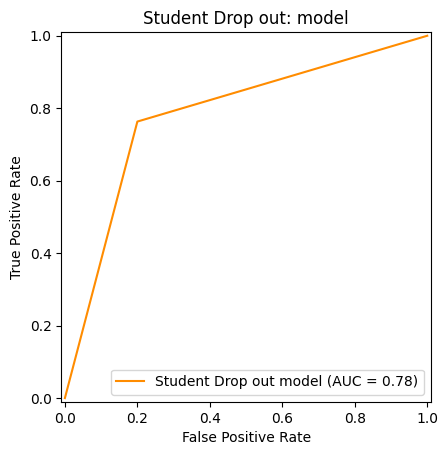

In [52]:
models_2, feature_importance_2 = hpo2.cross_validation_hpo(
    x=x2, y=y2,
    search_space=search_space, 
    folds=5,
    algo='rf'
    )

In [53]:
feature_importance_2

,Feature,Importance
6,M07_2_N,0.341148
9,M10_2_N,0.225283
10,M11_2_N,0.213355
7,M08_2_N,0.060205
8,M09_2_N,0.034483
4,M05_2_N,0.030435
5,M06_2_N,0.028476
2,M03_2_N,0.025119
1,M02_2_N,0.021448
0,M01_2_N,0.020048


#### Shap analysis

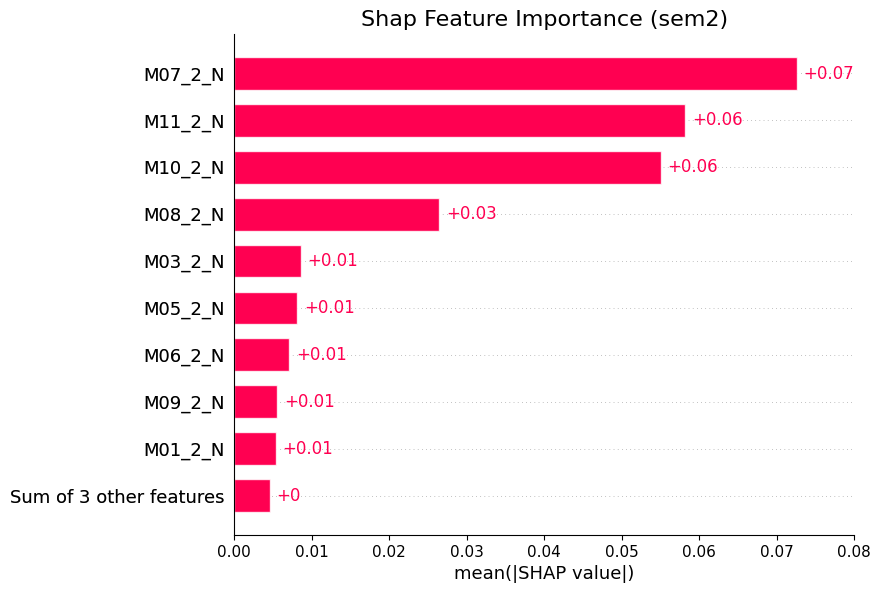

In [54]:
## Shap Global explainations
import shap
explainer2 = shap.TreeExplainer(models_2['model'], models_2['x_train'])
shap_values2 = explainer2(models_2['x_test'])

plt.title('Shap Feature Importance (sem2)', fontsize=16)
shap.plots.bar(shap_values2[...,1])

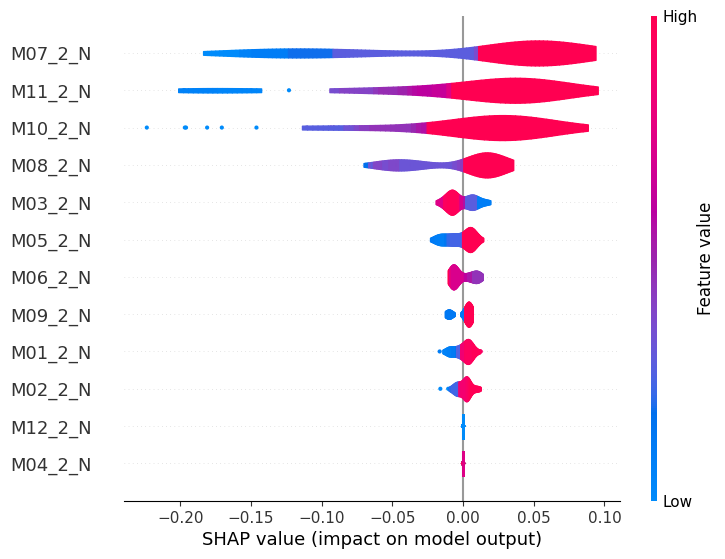

In [55]:
shap.plots.violin(shap_values2[...,1], show=True)

In [56]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values2[...,1], link='logit')

In [57]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=11, link='logit', model_name='rf')

Student index 11 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.239, Probability [1]: 0.761


In [58]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=12, link='logit', model_name='rf')

Student index 12 grades:
         grades
M01_2_N     3.3
M02_2_N     3.3
M03_2_N     2.7
M04_2_N     3.7
M05_2_N     2.0
M06_2_N     2.7
M07_2_N     4.0
M08_2_N     3.0
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     2.7
M12_2_N     5.1
Status: 1, Prediction: [0], Probability [0]: 0.717, Probability [1]: 0.283


In [59]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=16, link='logit', model_name='rf')

Student index 16 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     1.3
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.216, Probability [1]: 0.784


In [60]:
hpo2.plot_shap_force(model=models_2, shap_values=shap_values2, student_index=26, link='logit', model_name='rf')

Student index 26 grades:
         grades
M01_2_N     1.7
M02_2_N     3.3
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.256, Probability [1]: 0.744


## BHT semester 3

In [71]:
# Count occurrences of each unique value in the 'status' column
counter_3 = Counter(BHT_3['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_3[1]} | 0: {counter_3[0]}')
hpo3 = ModelTrainer(random_state=75)
x3, y3 = hpo3.split_data(BHT_3, module3)

Quantity of Drop Out and Degree in THL-1: 
 1: 134 | 0: 48


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:01<00:00,  7.65trial/s, best loss: -0.7834956709956711]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            04               06
	 actual 1            02               25

Model parameters:
{'bootstrap': True, 'ccp_alpha': 0.17869335709563638, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.003134377585838949, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 45, 'n_jobs': None, 'oob_score': True, 'random_state': 75, 'verbose': 0, 'warm_start': False}

Balanced acc.: 66.29630%
Validation accuracy.: 78.37838%
Sensitivity score (for 1): 92.59259%
Specificity score (for 0): 40.00000%
F1 score.: 86.20690%
False prediction: 21.62162%

-----------------------

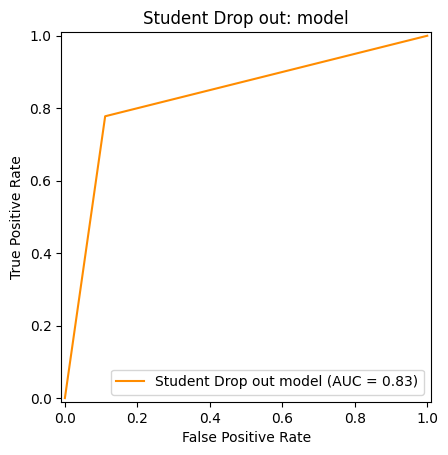

In [72]:
models_3, feature_importance_3 = hpo3.cross_validation_hpo(
    x=x3, y=y3,
    search_space=search_space, 
    folds=5,
    algo='rf'
    )

In [73]:
feature_importance_3

,Feature,Importance
9,M10_3_N,0.336797
12,M13_3_N,0.094672
11,M12_3_N,0.086194
13,M14_3_N,0.071299
7,M08_3_N,0.068223
8,M09_3_N,0.067234
2,M03_3_N,0.061307
1,M02_3_N,0.059942
15,M16_3_N,0.030381
10,M11_3_N,0.029751


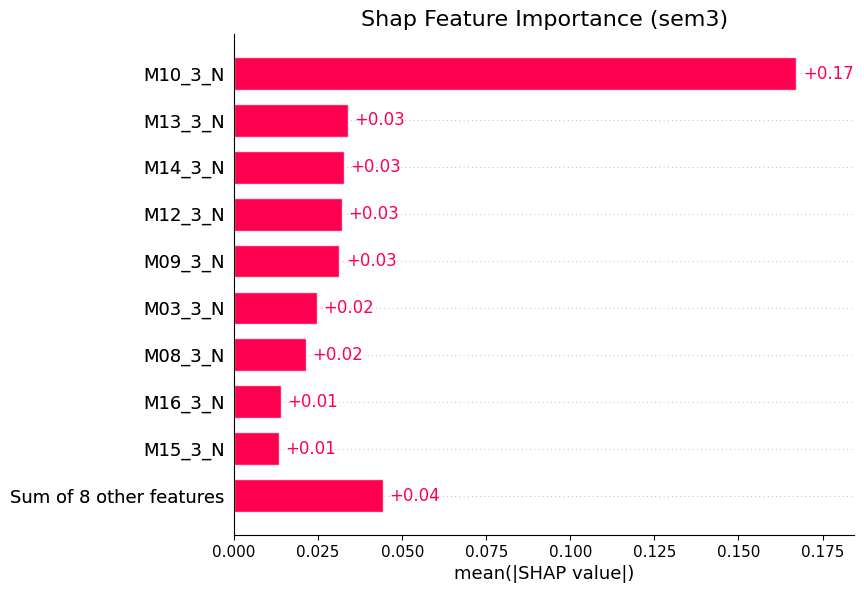

In [74]:
## Shap Global explainations
import shap
explainer3 = shap.TreeExplainer(models_3['model'], models_3['x_train'])
shap_values3 = explainer3(models_3['x_test'])

plt.title('Shap Feature Importance (sem3)', fontsize=16)
shap.plots.bar(shap_values3[..., 1])

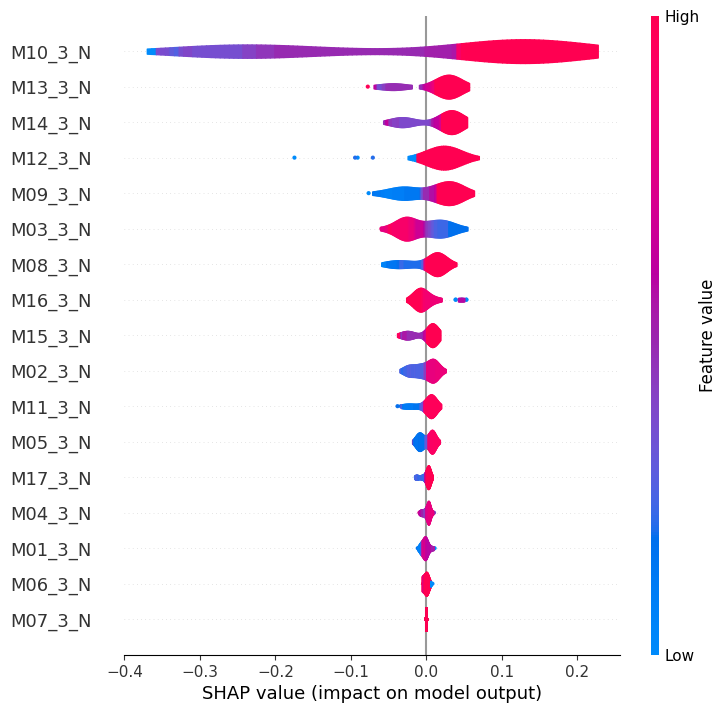

In [75]:
shap.plots.violin(shap_values3[..., 1], show=True)

In [76]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values3[..., 1], link='identity')

In [77]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=1, link='identity', model_name='rf')

Student index 1 grades:
         grades
M01_3_N     5.0
M02_3_N     1.7
M03_3_N     5.0
M04_3_N     5.1
M05_3_N     5.0
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.113, Probability [1]: 0.887


In [78]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=4, link='identity', model_name='rf')

Student index 4 grades:
         grades
M01_3_N     3.0
M02_3_N     5.1
M03_3_N     3.0
M04_3_N     5.1
M05_3_N     5.1
M06_3_N     2.0
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     2.7
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.180, Probability [1]: 0.820


In [79]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=14, link='identity', model_name='rf')

Student index 14 grades:
         grades
M01_3_N     2.0
M02_3_N     2.3
M03_3_N     1.7
M04_3_N     3.0
M05_3_N     1.3
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     2.0
M09_3_N     1.3
M10_3_N     4.0
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 0, Prediction: [0], Probability [0]: 0.678, Probability [1]: 0.322


In [80]:
hpo3.plot_shap_force(model=models_3, shap_values=shap_values3, student_index=6, link='identity', model_name='rf')

Student index 6 grades:
         grades
M01_3_N     4.0
M02_3_N     2.7
M03_3_N     2.3
M04_3_N     4.0
M05_3_N     2.3
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     1.7
M09_3_N     1.3
M10_3_N     3.7
M11_3_N     3.0
M12_3_N     5.1
M13_3_N     3.0
M14_3_N     3.3
M15_3_N     2.3
M16_3_N     3.0
M17_3_N     3.0
Status: 0, Prediction: [0], Probability [0]: 0.812, Probability [1]: 0.188
